<a href="https://colab.research.google.com/github/Engyogesh/miniproject/blob/main/miniproject_Forest_Fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from tabulate import tabulate
import traceback
import numpy as np
import matplotlib.pyplot as plt
from requests import get
import requests
import os



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [ ]:
Data = pd.read_csv(r'/content/gdrive/My Drive/mini project/forestfires.csv')
display(pd.DataFrame(Data))
forestfires_df = pd.DataFrame(Data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


In [ ]:
top_burnt_area = forestfires_df.groupby('month')['area'].sum().nlargest(10).reset_index()
print(tabulate(top_burnt_area, headers='keys', tablefmt='grid'))

+----+---------+---------+
|    | month   |    area |
+====+=========+=========+
|  0 | sep     | 3086.13 |
+----+---------+---------+
|  1 | aug     | 2297.99 |
+----+---------+---------+
|  2 | jul     |  459.83 |
+----+---------+---------+
|  3 | mar     |  235.26 |
+----+---------+---------+
|  4 | feb     |  125.5  |
+----+---------+---------+
|  5 | dec     |  119.97 |
+----+---------+---------+
|  6 | oct     |   99.57 |
+----+---------+---------+
|  7 | jun     |   99.3  |
+----+---------+---------+
|  8 | apr     |   80.02 |
+----+---------+---------+
|  9 | may     |   38.48 |
+----+---------+---------+


In [ ]:
temp_stats = forestfires_df.groupby('month')['temp'].agg(['max', 'min']).reset_index()
temp_stats.columns = ['month', 'highest_temp', 'lowest_temp']
print(tabulate(temp_stats, headers='keys', tablefmt='grid'))

+----+---------+----------------+---------------+
|    | month   |   highest_temp |   lowest_temp |
+====+=========+================+===============+
|  0 | apr     |           17.6 |           5.8 |
+----+---------+----------------+---------------+
|  1 | aug     |           33.3 |           5.1 |
+----+---------+----------------+---------------+
|  2 | dec     |            5.1 |           2.2 |
+----+---------+----------------+---------------+
|  3 | feb     |           15.7 |           4.2 |
+----+---------+----------------+---------------+
|  4 | jan     |            5.3 |           5.2 |
+----+---------+----------------+---------------+
|  5 | jul     |           30.2 |          12.6 |
+----+---------+----------------+---------------+
|  6 | jun     |           28   |          10.6 |
+----+---------+----------------+---------------+
|  7 | mar     |           18.8 |           5.3 |
+----+---------+----------------+---------------+
|  8 | may     |           18   |          11.3 |


In [ ]:
wind_stats = forestfires_df.groupby('month')['wind'].agg(['max', 'min']).reset_index()
wind_stats.columns = ['month', 'highest_wind', 'lowest_wind']
print(tabulate(wind_stats, headers='keys', tablefmt='grid'))

+----+---------+----------------+---------------+
|    | month   |   highest_wind |   lowest_wind |
+====+=========+================+===============+
|  0 | apr     |            9.4 |           1.8 |
+----+---------+----------------+---------------+
|  1 | aug     |            8.9 |           0.4 |
+----+---------+----------------+---------------+
|  2 | dec     |            8.5 |           4.9 |
+----+---------+----------------+---------------+
|  3 | feb     |            9.4 |           0.9 |
+----+---------+----------------+---------------+
|  4 | jan     |            3.1 |           0.9 |
+----+---------+----------------+---------------+
|  5 | jul     |            8   |           0.9 |
+----+---------+----------------+---------------+
|  6 | jun     |            9.4 |           1.3 |
+----+---------+----------------+---------------+
|  7 | mar     |            9.4 |           0.9 |
+----+---------+----------------+---------------+
|  8 | may     |            4.9 |           4   |


In [ ]:
rh_stats = forestfires_df.groupby('month')['RH'].agg(['max', 'min']).reset_index()
rh_stats.columns = ['month', 'highest_rh', 'lowest_rh']
print(tabulate(rh_stats, headers='keys', tablefmt='grid'))

+----+---------+--------------+-------------+
|    | month   |   highest_rh |   lowest_rh |
+====+=========+==============+=============+
|  0 | apr     |           75 |          20 |
+----+---------+--------------+-------------+
|  1 | aug     |           96 |          19 |
+----+---------+--------------+-------------+
|  2 | dec     |           61 |          21 |
+----+---------+--------------+-------------+
|  3 | feb     |           82 |          35 |
+----+---------+--------------+-------------+
|  4 | jan     |          100 |          78 |
+----+---------+--------------+-------------+
|  5 | jul     |           90 |          22 |
+----+---------+--------------+-------------+
|  6 | jun     |           90 |          25 |
+----+---------+--------------+-------------+
|  7 | mar     |           99 |          18 |
+----+---------+--------------+-------------+
|  8 | may     |           94 |          40 |
+----+---------+--------------+-------------+
|  9 | nov     |           31 |   

In [ ]:
final_stats = top_burnt_area.merge(temp_stats, on='month') \
                            .merge(wind_stats, on='month') \
                            .merge(rh_stats, on='month')
print(tabulate(final_stats, headers='keys', tablefmt='grid'))


+----+---------+---------+----------------+---------------+----------------+---------------+--------------+-------------+
|    | month   |    area |   highest_temp |   lowest_temp |   highest_wind |   lowest_wind |   highest_rh |   lowest_rh |
+====+=========+=========+================+===============+================+===============+==============+=============+
|  0 | sep     | 3086.13 |           30.2 |           9.8 |            7.6 |           0.9 |           86 |          15 |
+----+---------+---------+----------------+---------------+----------------+---------------+--------------+-------------+
|  1 | aug     | 2297.99 |           33.3 |           5.1 |            8.9 |           0.4 |           96 |          19 |
+----+---------+---------+----------------+---------------+----------------+---------------+--------------+-------------+
|  2 | jul     |  459.83 |           30.2 |          12.6 |            8   |           0.9 |           90 |          22 |
+----+---------+--------

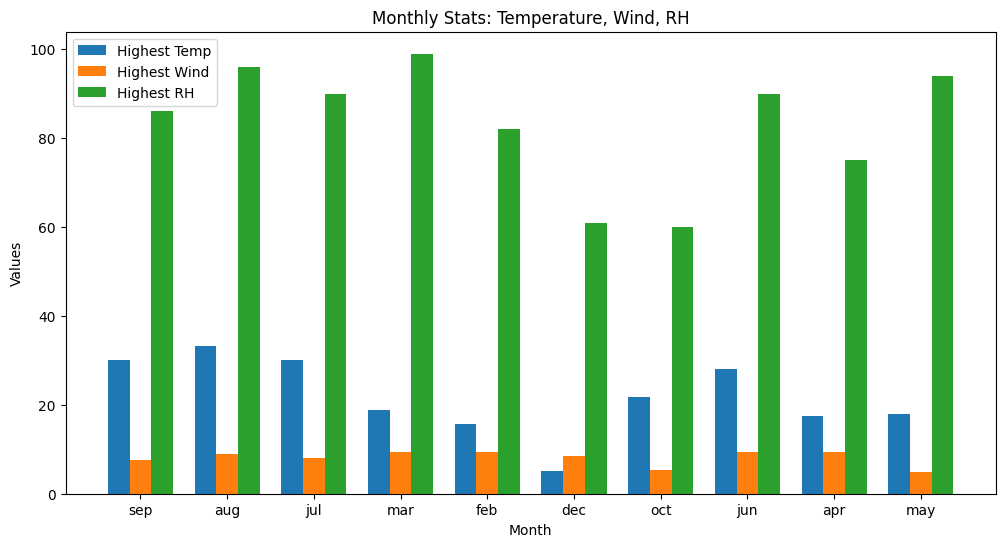

In [ ]:
x = np.arange(len(final_stats['month']))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

ax.bar(x - width, final_stats['highest_temp'], width, label='Highest Temp')
ax.bar(x, final_stats['highest_wind'], width, label='Highest Wind')
ax.bar(x + width, final_stats['highest_rh'], width, label='Highest RH')

ax.set_xlabel('Month')
ax.set_ylabel('Values')
ax.set_title('Monthly Stats: Temperature, Wind, RH')
ax.set_xticks(x)
ax.set_xticklabels(final_stats['month'])
ax.legend()

plt.show()


In [ ]:
df1 = pd.read_csv(r'/content/gdrive/My Drive/mini project/department.csv')
df2 = pd.read_csv(r'/content/gdrive/My Drive/mini project/employee.csv')
df3 = pd.read_csv(r'/content/gdrive/My Drive/mini project/not_active.csv')

Data = pd.concat([df1, df2, df3], ignore_index=True)
display(pd.DataFrame(Data))
df = pd.DataFrame(Data)

,emp_id,department,salary
0,1,sales,NaN
1,2,sales,NaN
2,3,sales,NaN
3,4,sales,NaN
4,5,marketing,NaN
5,6,marketing,NaN
6,7,marketing,NaN
7,1,NaN,100.0
8,2,NaN,120.0
9,3,NaN,145.0


In [ ]:
max_salary_per_dept = df.groupby('department')['salary'].max().reset_index()

# Merge with the original DataFrame to get only employees with max salary per department
result = pd.merge(df, max_salary_per_dept, on=['department', 'salary'], how='inner')

# Select only the required columns
result = result[['emp_id', 'department', 'salary']]

# Rename 'salary' column to 'max_salary'
result.rename(columns={'salary': 'max_salary'}, inplace=True)

print(result)

   emp_id department  max_salary
0       1      sales         NaN
1       2      sales         NaN
2       3      sales         NaN
3       4      sales         NaN
4       5  marketing         NaN
5       6  marketing         NaN
6       7  marketing         NaN
